In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature

In [4]:
q1 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsos1.csv")
q2 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/stars1r1.csv")
q3 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsovali.csv")
q4 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/starvali.csv")

In [5]:
q1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [6]:
data1 = pd.concat([q1, q2], ignore_index = True)
#merge q1 and q2#
data2 = pd.concat([q3, q4], ignore_index = True)
#merge q3 and q4#

In [7]:
data1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [8]:
target_names=np.array(['QSO','STAR'])

In [9]:
train = data1
test = data2

In [10]:
train.sort_index(inplace=True)
test.sort_index(inplace=True)

In [11]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 20000
Number of observations in the test data: 20000


In [12]:
# Create a list of the feature column's names
features = train.columns[:8]

# View features
features

Index(['gw1', 'rw1', 'iw1', 'zw1', 'yw1', 'w12', 'ipk', 'zpk'], dtype='object')

In [13]:
pd.factorize(train['class'])

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['QSO', 'STAR'], dtype='object'))

In [14]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['class'])[0]

# View target
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [15]:
train['class']

0         QSO
1         QSO
2         QSO
3         QSO
4         QSO
5         QSO
6         QSO
7         QSO
8         QSO
9         QSO
10        QSO
11        QSO
12        QSO
13        QSO
14        QSO
15        QSO
16        QSO
17        QSO
18        QSO
19        QSO
20        QSO
21        QSO
22        QSO
23        QSO
24        QSO
25        QSO
26        QSO
27        QSO
28        QSO
29        QSO
         ... 
19970    STAR
19971    STAR
19972    STAR
19973    STAR
19974    STAR
19975    STAR
19976    STAR
19977    STAR
19978    STAR
19979    STAR
19980    STAR
19981    STAR
19982    STAR
19983    STAR
19984    STAR
19985    STAR
19986    STAR
19987    STAR
19988    STAR
19989    STAR
19990    STAR
19991    STAR
19992    STAR
19993    STAR
19994    STAR
19995    STAR
19996    STAR
19997    STAR
19998    STAR
19999    STAR
Name: class, Length: 20000, dtype: object

In [16]:
clf = RandomForestClassifier(n_estimators=100, 
#                              max_features=1,
#                              max_depth=1,
                             n_jobs=8,
#并行处理的几何数
                             random_state=15,
                             #随机数种子
                             class_weight="balanced"
#                              ,
#                              class_weight={0:1,1:20,2:5}
                            )
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=8, oob_score=False,
                       random_state=15, verbose=0, warm_start=False)

In [17]:
#y_test为样本实际的类别
y_test = pd.factorize(test['class'])[0]
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
#test.iloc[:,:8].values

In [19]:
#predict_proba返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1。
#y_pred = clf.predict_proba(test.iloc[:,:8].values)

#y_pred

In [20]:
#range(len(y_pred))

In [21]:
#y_pred.transpose()[0]

In [22]:
y_pred = clf.predict_proba(test[features])
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:
#y_scores为样本为正例的概率
#y_scores = np.array([y_pred[i][0] if y_test[i]==0 else y_pred[i][1] for i in range(len(y_pred))])
#y_scores = np.array([y_pred[i][1] for i in range(len(y_pred))])
#y_scores

In [24]:
#或者用theshold作步长的循环

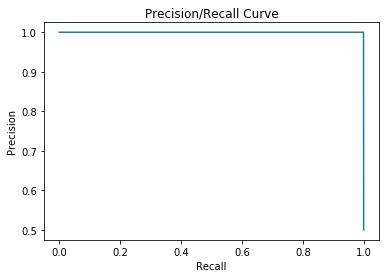

In [25]:
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

precision, recall, thresholds = precision_recall_curve(y_test, y_pred.transpose()[1])
plt.plot(recall,precision)
plt.show()

In [26]:
scores=cross_val_score(clf,train[features],y,cv=5)
print("交叉验证准确率：",scores)

交叉验证准确率： [0.99925 1.      0.99975 0.998   1.     ]


In [27]:
# Create actual english names for the plants for each predicted plant class
preds = target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['class'], preds, rownames=['Actual classes'], colnames=['Predicted classes'])

Predicted classes,QSO,STAR
Actual classes,,
QSO,9999,1
STAR,12,9988


In [28]:
test['preds'] = preds
preds

array(['QSO', 'QSO', 'QSO', ..., 'STAR', 'STAR', 'STAR'], dtype='<U4')

In [29]:
TP = len(test[(test['preds']=='QSO')&(test['class']=='QSO')])
TN = len(test[(test['preds']=='STAR')&(test['class']=='STAR')])
FN = len(test[(test['preds']=='STAR')&(test['class']=='QSO')])
FP = len(test[(test['preds']=='QSO')&(test['class']=='STAR')])

In [30]:
P = TP/(TP+FP)
P

0.9988013185495954

In [31]:
R = TP/(TP+FN)
R

0.9999

In [32]:
F1 = (2*P*R)/(P+R)
F1

0.9993503573034831

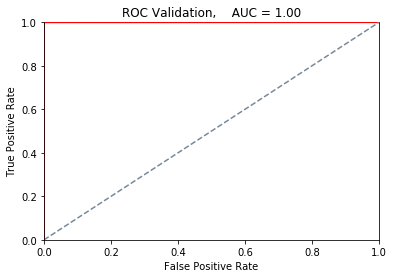

In [35]:
from sklearn.metrics import roc_curve, auc

pred_valid = y_pred[:, 1]
valid_y = y_test
fpr, tpr, _ = roc_curve(valid_y, pred_valid)
roc_auc = auc(fpr, tpr)

fig, ax=plt.subplots()
ax.set_title('ROC Validation,    AUC = %0.2f' % roc_auc)
ax.spines['top'].set_visible(False)
ax.plot(fpr, tpr, 'r', label='AUC = ')
ax.plot([0, 1], [0, 1], color='#778899', linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.show()

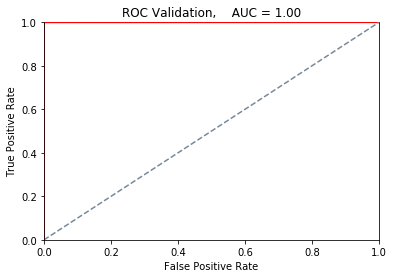